In [2]:
import pandas as pd
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
NobelData = pd.read_csv("archiveData_Cleaned.csv")
NobelData

,Unnamed: 0,Year,Category,Prize,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany
1,1,1901,Literature,The Nobel Prize in Literature 1901,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,Self,Self
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany
3,3,1901,Peace,The Nobel Peace Prize 1901,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Self,Self,Self
4,4,1901,Peace,The Nobel Peace Prize 1901,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Self,Self,Self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan
877,965,2016,Peace,The Nobel Peace Prize 2016,1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,Self,Self,Self
878,966,2016,Physics,The Nobel Prize in Physics 2016,1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America
879,967,2016,Physics,The Nobel Prize in Physics 2016,1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America


## Creating data frames for each prize category for visualization

In [4]:
Chemistry = NobelData[(NobelData.Category == 'Chemistry')]
Economics = NobelData[(NobelData.Category == 'Economics')]
Literature = NobelData[(NobelData.Category == 'Literature')]
Medicine = NobelData[(NobelData.Category == 'Medicine')]
Peace = NobelData[(NobelData.Category == 'Peace')]
Physics = NobelData[(NobelData.Category == 'Physics')]


## Nobel Prizes by Category from 1901 to 2016

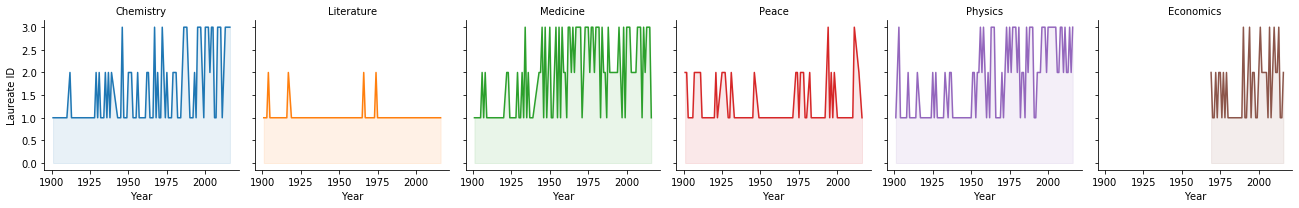

In [5]:
YearCategory=NobelData.groupby(['Year','Category'])['Laureate ID'].count().reset_index()
YearCategory
g = sns.FacetGrid(YearCategory, col='Category', hue='Category', col_wrap=8, )
g = g.map(plt.plot, 'Year', 'Laureate ID')
g = g.map(plt.fill_between, 'Year', 'Laureate ID', alpha=0.1).set_titles("{col_name} Category")
g = g.set_titles("{col_name}")
plt.show()

## Number of Nobel Prizes in each category

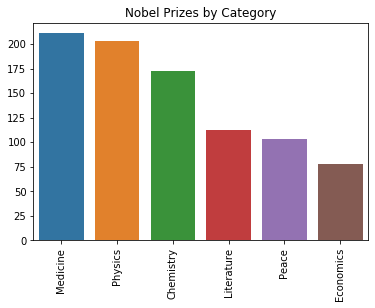

In [6]:

NobelCategory=NobelData['Category'].value_counts()
sns.barplot(x=NobelCategory.index,y=NobelCategory.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Category')
plt.show()

## Visualization of number of prizes in each country in every category, USA dominance

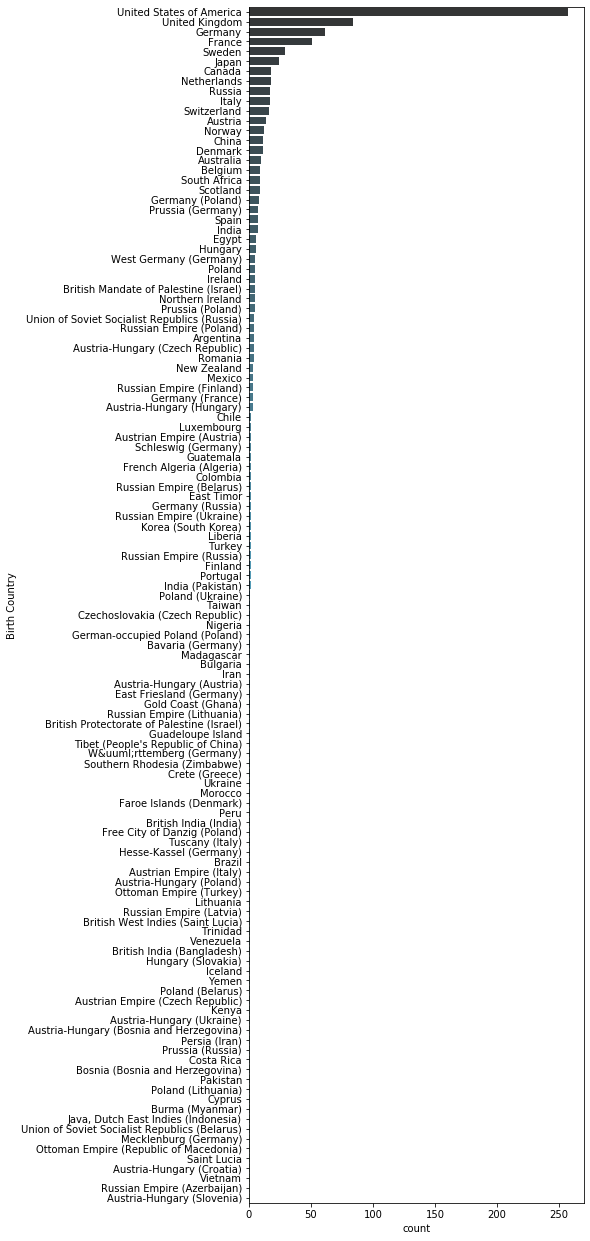

In [7]:

plt.figure(figsize=(6,22))
DataGraph = sns.countplot(y="Birth Country", data=NobelData,
              order=NobelData['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Chemistry category

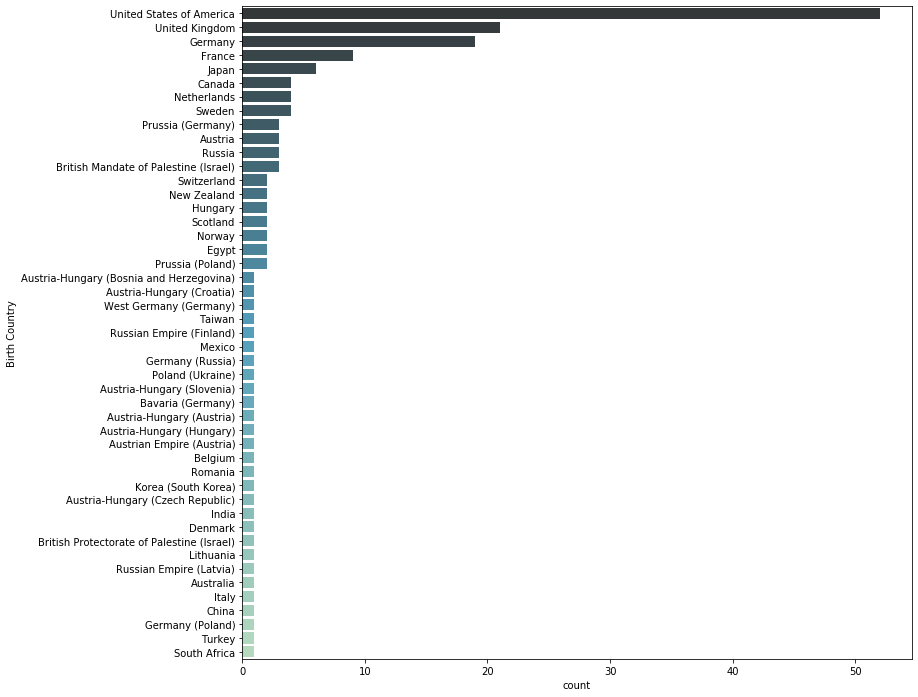

In [8]:
plt.figure(figsize=(12,12))
ChemestryGraph = sns.countplot(y="Birth Country", data=Chemistry,
              order=Chemistry['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Economics category

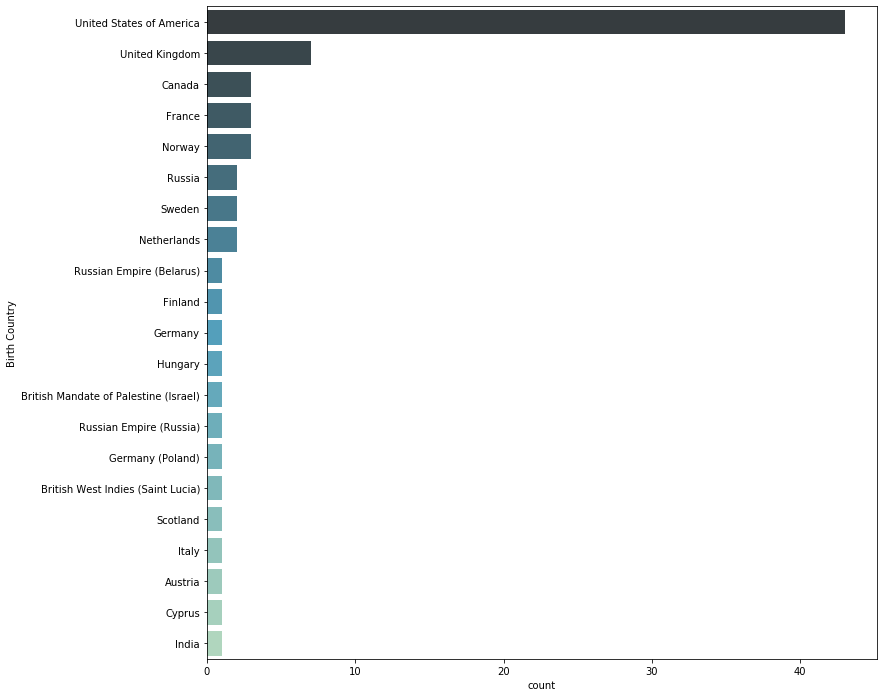

In [9]:
plt.figure(figsize=(12,12))
EconomicsGraph = sns.countplot(y="Birth Country", data=Economics,
              order=Economics['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Literature category

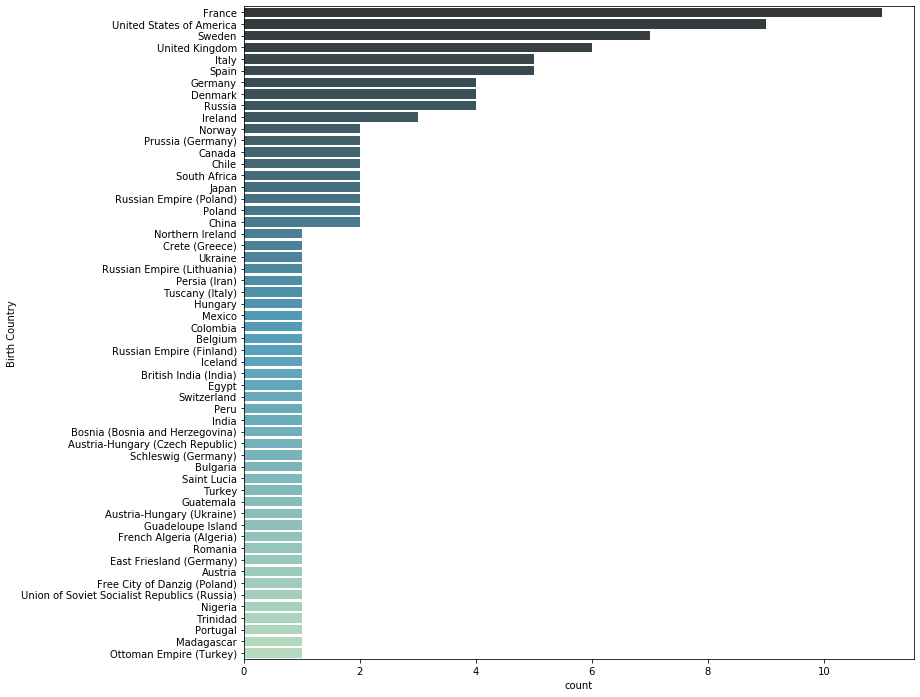

In [10]:
plt.figure(figsize=(12,12))
LiteratureGraph = sns.countplot(y="Birth Country", data=Literature,
              order=Literature['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Medicine category

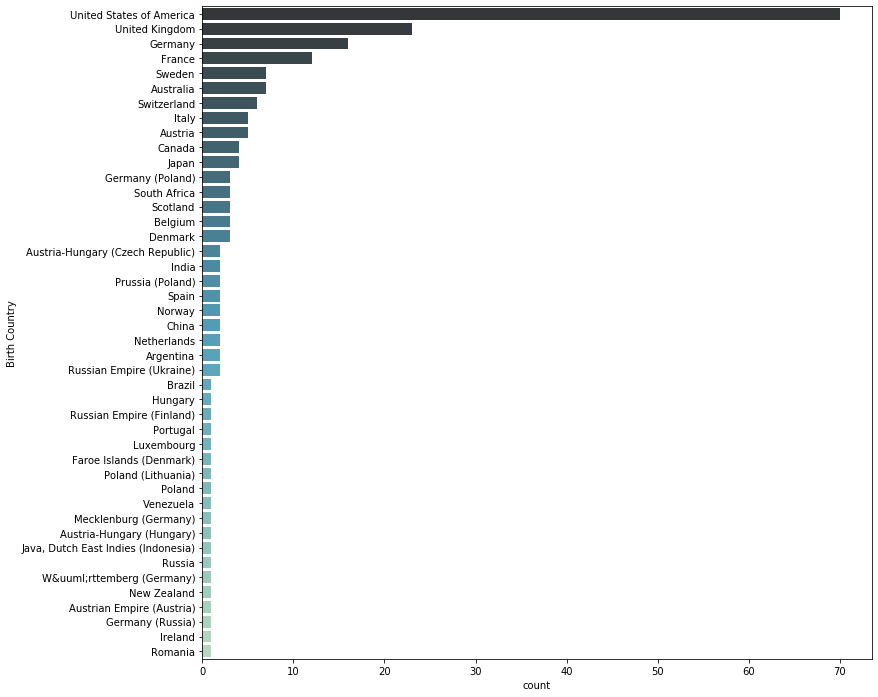

In [11]:
plt.figure(figsize=(12,12))
MedicineGraph = sns.countplot(y="Birth Country", data=Medicine,
              order=Medicine['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Peace category

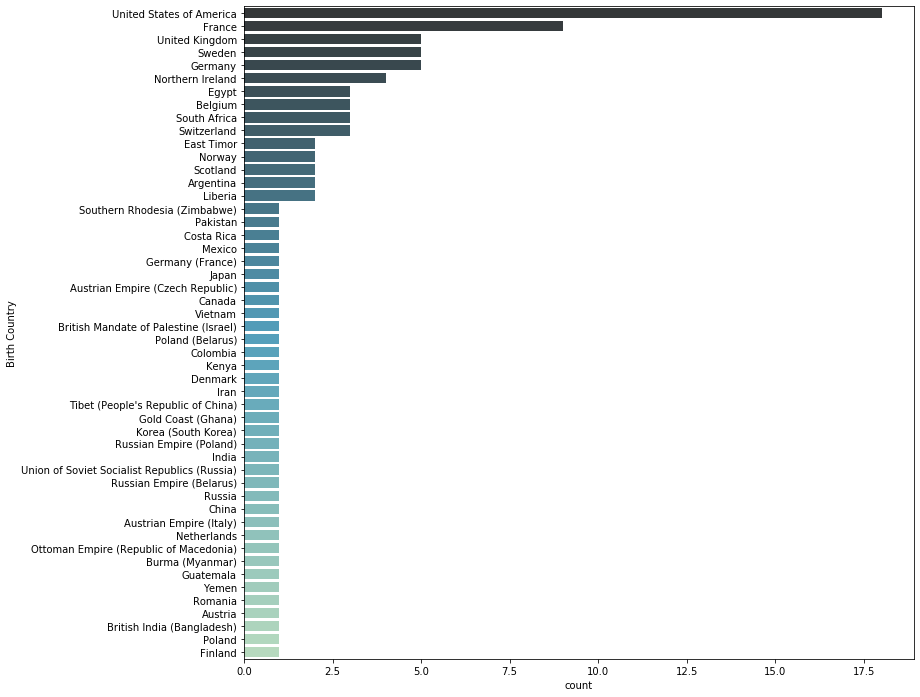

In [12]:
plt.figure(figsize=(12,12))
PeaceGraph = sns.countplot(y="Birth Country", data=Peace,
              order=Peace['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Visualization of number of prizes in each country in Physics category

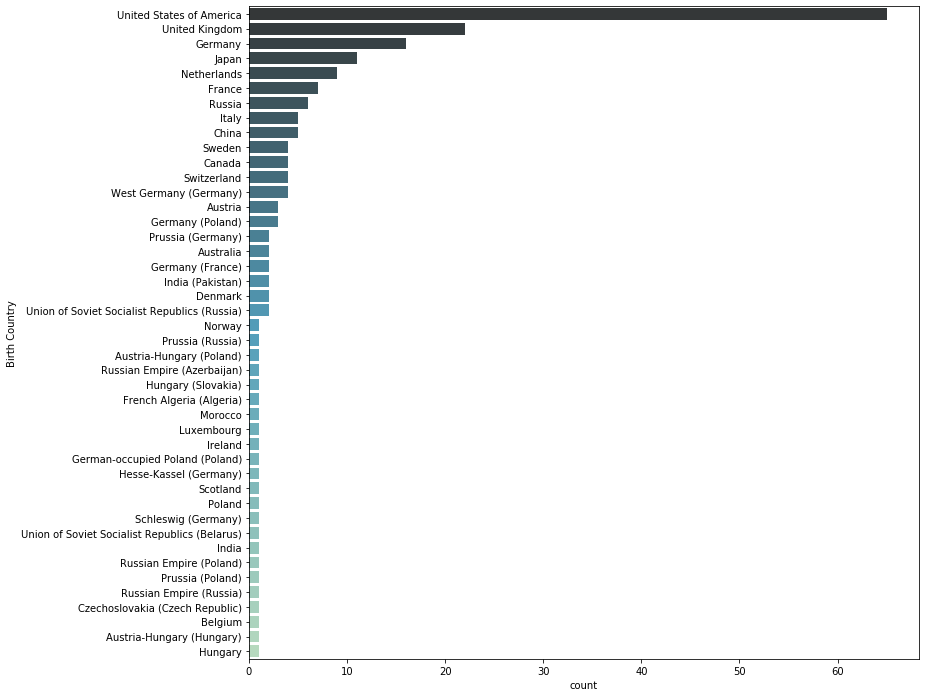

In [13]:
plt.figure(figsize=(12,12))
PhysicsGraph = sns.countplot(y="Birth Country", data=Physics,
              order=Physics['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

## Pie chart for the whole dataframe gender, which gender is most likely to win a nobel prize?

Male      833
Female     48
Name: Sex, dtype: int64


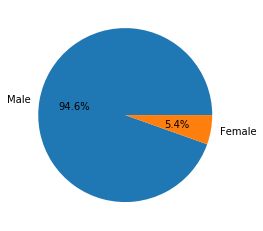

In [14]:
from matplotlib.pyplot import pie, axis, show

AllCategoryGender = NobelData['Sex'].value_counts()
print(AllCategoryGender)

pie(AllCategoryGender, labels=AllCategoryGender.index, autopct='%1.1f%%');
show()

## Age differences between the whole nobel prize categories

In [15]:
import warnings
warnings.filterwarnings('ignore')
NobelData['Birth Date'] = NobelData['Birth Date'].str[0:4]
NobelData['Birth Date'] = NobelData['Birth Date'].replace(to_replace="nan", value=0)
NobelData['Birth Date'] = NobelData['Birth Date'].apply(pd.to_numeric)
NobelData["Age"] = NobelData["Year"] - NobelData["Birth Date"]

In [16]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
NobelData['Age Categorical'] = pd.cut(NobelData['Age'], bins, labels=groupNames)

60s      248
50s      228
70s      155
40s      155
30s       48
80s       44
90s        1
20s        1
Teens      1
Name: Age Categorical, dtype: int64


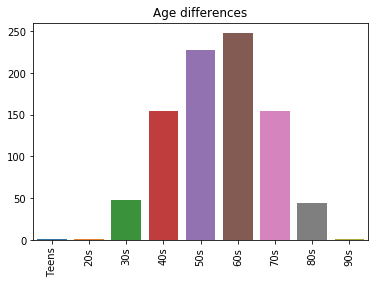

In [17]:
NobelAge = NobelData['Age Categorical'].value_counts()
print(NobelAge)



sns.barplot(x=NobelAge.index,y=NobelAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()


## Age differences between the chemistry category

In [18]:
Chemistry['Birth Date'] = Chemistry['Birth Date'].str[0:4]
Chemistry['Birth Date'] = Chemistry['Birth Date'].replace(to_replace="nan", value=0)
Chemistry['Birth Date'] = Chemistry['Birth Date'].apply(pd.to_numeric)
Chemistry["Age"] = Chemistry["Year"] - Chemistry["Birth Date"]

In [19]:
bins = [29, 39, 49, 59, 69, 79, 89,]
groupNames = ['30s', '40s', '50s', '60s', '70s', '80s']
Chemistry['Age Categorical'] = pd.cut(Chemistry['Age'], bins, labels=groupNames)


50s    57
60s    46
40s    34
70s    22
80s     7
30s     7
Name: Age Categorical, dtype: int64


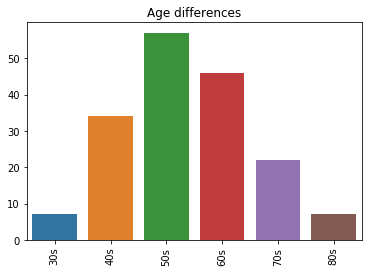

In [20]:
ChemistryAge = Chemistry['Age Categorical'].value_counts()
print(ChemistryAge)

sns.barplot(x=ChemistryAge.index,y=ChemistryAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Age differences between the Economics category

In [21]:
Economics['Birth Date'] = Economics['Birth Date'].str[0:4]
Economics['Birth Date'] = Economics['Birth Date'].replace(to_replace="nan", value=0)
Economics['Birth Date'] = Economics['Birth Date'].apply(pd.to_numeric)
Economics["Age"] = Economics["Year"] - Economics["Birth Date"]

In [22]:
bins = [49, 59, 69, 79, 89, 100]
groupNames = ['50s', '60s', '70s', '80s', '90s']
Economics['Age Categorical'] = pd.cut(Economics['Age'], bins, labels=groupNames)

60s    39
70s    22
50s    12
80s     4
90s     1
Name: Age Categorical, dtype: int64


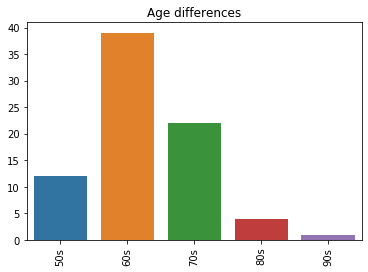

In [23]:
EconomicsAge = Economics['Age Categorical'].value_counts()
print(EconomicsAge)

sns.barplot(x=EconomicsAge.index,y=EconomicsAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Age differences between the Literature  category

In [24]:
Literature['Birth Date'] = Literature['Birth Date'].str[0:4]
Literature['Birth Date'] = Literature['Birth Date'].replace(to_replace="nan", value=0)
Literature['Birth Date'] = Literature['Birth Date'].apply(pd.to_numeric)
Literature["Age"] = Literature["Year"] - Literature["Birth Date"]

In [25]:
bins = [39, 49, 59, 69, 79, 89]
groupNames = ['40s', '50s', '60s', '70s', '80s']
Literature['Age Categorical'] = pd.cut(Literature['Age'], bins, labels=groupNames)

60s    37
70s    33
50s    28
40s     9
80s     6
Name: Age Categorical, dtype: int64


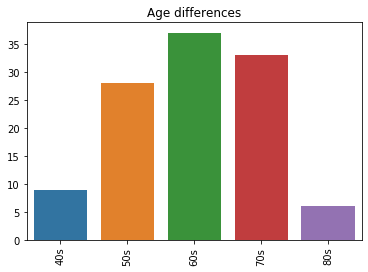

In [26]:
LiteratureAge = Literature['Age Categorical'].value_counts()
print(LiteratureAge)

sns.barplot(x=LiteratureAge.index,y=LiteratureAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Age differences between the Medicine category

In [27]:
Medicine['Birth Date'] = Medicine['Birth Date'].str[0:4]
Medicine['Birth Date'] = Medicine['Birth Date'].replace(to_replace="nan", value=0)
Medicine['Birth Date'] = Medicine['Birth Date'].apply(pd.to_numeric)
Medicine["Age"] = Medicine["Year"] - Medicine["Birth Date"]

In [28]:
bins = [29, 39, 49, 59, 69, 79, 89]
groupNames = ['30s', '40s', '50s', '60s', '70s', '80s']
Medicine['Age Categorical'] = pd.cut(Medicine['Age'], bins, labels=groupNames)

50s    63
60s    54
40s    43
70s    29
30s    12
80s    10
Name: Age Categorical, dtype: int64


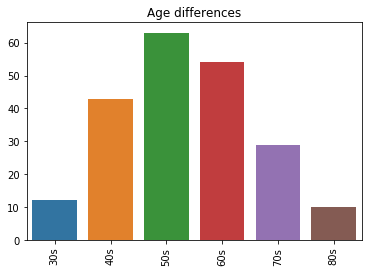

In [29]:
MedicineAge = Medicine['Age Categorical'].value_counts()
print(MedicineAge)

sns.barplot(x=MedicineAge.index,y=MedicineAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Age differences between the Peace category

In [30]:
Peace['Birth Date'] = Peace['Birth Date'].str[0:4]
Peace['Birth Date'] = Peace['Birth Date'].replace(to_replace="nan", value=0)
Peace['Birth Date'] = Peace['Birth Date'].apply(pd.to_numeric)
Peace["Age"] = Peace["Year"] - Peace["Birth Date"]

In [31]:
bins = [0, 29, 39, 49, 59, 69, 79, 89]
groupNames = ['Teens','30s', '40s', '50s', '60s', '70s', '80s']
Peace['Age Categorical'] = pd.cut(Peace['Age'], bins, labels=groupNames)

60s      31
70s      26
50s      19
40s      14
80s       6
30s       6
Teens     1
Name: Age Categorical, dtype: int64


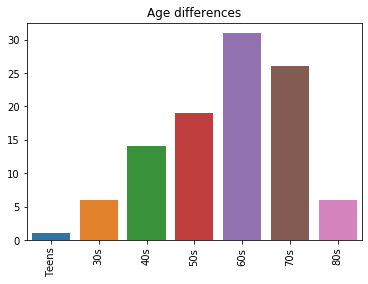

In [32]:
PeaceAge = Peace['Age Categorical'].value_counts()
print(PeaceAge)

sns.barplot(x=PeaceAge.index,y=PeaceAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Age differences between the Physics category

In [33]:
Physics['Birth Date'] = Physics['Birth Date'].str[0:4]
Physics['Birth Date'] = Physics['Birth Date'].replace(to_replace="nan", value=0)
Physics['Birth Date'] = Physics['Birth Date'].apply(pd.to_numeric)
Physics["Age"] = Physics["Year"] - Physics["Birth Date"]

In [34]:
bins = [19, 29, 39, 49, 59, 69, 79, 89]
groupNames = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
Physics['Age Categorical'] = pd.cut(Physics['Age'], bins, labels=groupNames)

40s    55
50s    49
60s    41
70s    23
30s    23
80s    11
20s     1
Name: Age Categorical, dtype: int64


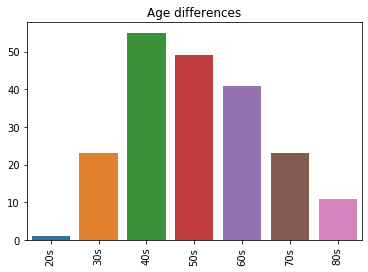

In [35]:
PhysicsAge = Physics['Age Categorical'].value_counts()
print(PhysicsAge)

sns.barplot(x=PhysicsAge.index,y=PhysicsAge.values)
plt.xticks(rotation=90)
plt.title('Age differences')
plt.show()

## Distribution of Age of Winners in each Category using boxplot

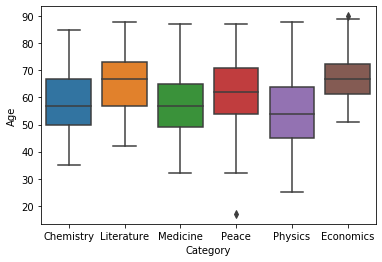

In [36]:
sns.boxplot(data=NobelData,
         x='Category',
         y='Age')

plt.show()

## Organizations with the largest number of nobel prizes

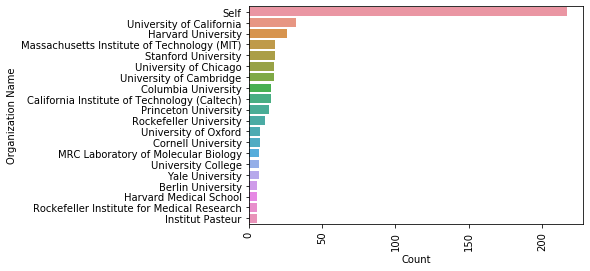

In [37]:
org = NobelData['Organization Name'].value_counts().reset_index().head(20)

sns.barplot(x='Organization Name',y='index',data=org)
plt.xticks(rotation=90)
plt.ylabel('Organization Name')
plt.xlabel('Count')
plt.show()

## Oldest nobel prize winners

In [38]:
OldestWinners=NobelData.nlargest(5,'Age')
display(OldestWinners[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
767,Economics,Leonid Hurwicz,Russia,Male,90
829,Economics,Lloyd S. Shapley,United States of America,Male,89
720,Physics,Raymond Davis Jr.,United States of America,Male,88
770,Literature,Doris Lessing,Persia (Iran),Female,88
360,Medicine,Peyton Rous,United States of America,Male,87


## Youngest nobel prize winners

In [39]:
YoungestWinner=NobelData.nsmallest(5,'Age')
display(YoungestWinner[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
856,Peace,Malala Yousafzai,Pakistan,Female,17
82,Physics,William Lawrence Bragg,Australia,Male,25
162,Physics,Werner Karl Heisenberg,Germany,Male,31
167,Physics,Paul Adrien Maurice Dirac,United Kingdom,Male,31
185,Physics,Carl David Anderson,United States of America,Male,31


## First woman to win the nobel prize

In [40]:
female=NobelData[NobelData['Sex']=="Female"].nsmallest(1,'Year')
female[['Year','Category','Full Name','Prize']]

,Year,Category,Full Name,Prize
19,1903,Physics,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903


## Repeat laureates

In [75]:
repeat=NobelData.groupby(['Category','Full Name']).filter(lambda group : len(group)>=2)
repeat

,Unnamed: 0,Year,Category,Prize,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age Categorical
45,46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,1/2,302,Individual,Paul Ehrlich,1854,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,54,50s
46,47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,1/2,302,Individual,Paul Ehrlich,1854,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,54,50s
154,157,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,189,Individual,Carl Bosch,1874,Cologne,Germany,Male,University of Heidelberg,Heidelberg,Germany,57,50s
155,158,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,189,Individual,Carl Bosch,1874,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,57,50s
156,159,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,190,Individual,Friedrich Bergius,1884,"Goldschmieden, near Breslau",Germany (Poland),Male,University of Heidelberg,Heidelberg,Germany,47,40s
157,160,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,190,Individual,Friedrich Bergius,1884,"Goldschmieden, near Breslau",Germany (Poland),Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,47,40s
176,179,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,1/3,328,Individual,William Parry Murphy,1892,"Stoughton, WI",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,42,40s
177,180,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,1/3,328,Individual,William Parry Murphy,1892,"Stoughton, WI",United States of America,Male,Peter Brent Brigham Hospital,"Boston, MA",United States of America,42,40s
184,187,1936,Chemistry,The Nobel Prize in Chemistry 1936,1/1,195,Individual,Petrus (Peter) Josephus Wilhelmus Debye,1884,Maastricht,Netherlands,Male,Berlin University,Berlin,Germany,52,50s
185,188,1936,Chemistry,The Nobel Prize in Chemistry 1936,1/1,195,Individual,Petrus (Peter) Josephus Wilhelmus Debye,1884,Maastricht,Netherlands,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin,Germany,52,50s


## How old are you when you get the prize?

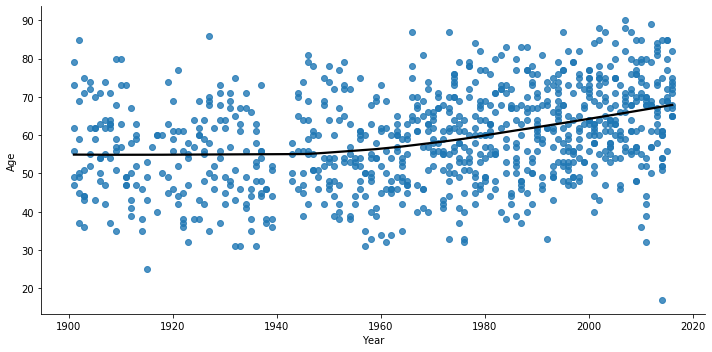

In [41]:
sns.lmplot('Year','Age',data=NobelData,lowess=True, aspect=2,  line_kws={'color' : 'black'})
plt.show()